In [1]:
# load the autoreload extension
%reload_ext autoreload
# Set extension to reload modules every time before executing code
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
%matplotlib inline

In [2]:
# Import random forest regressor and multioutput regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,mean_squared_error
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [3]:
full_data = np.load('machine_learning_data.npy')
np.random.shuffle(full_data)

In [4]:
X_data = pd.DataFrame(full_data[:,:-5])
y_data = pd.DataFrame(full_data[:,-5:])


In [5]:
def plot_corr(pred,test):
    sns.jointplot(pred.iloc[:,0],test.iloc[:,0],kind = "kde")
    sns.jointplot(pred.iloc[:,1],test.iloc[:,1],kind = 'kde',color='purple')
    sns.jointplot(pred.iloc[:,2],test.iloc[:,2],kind = 'kde',color='blue')
    sns.jointplot(pred.iloc[:,3],test.iloc[:,3],kind = 'kde',color='green')
    sns.jointplot(pred.iloc[:,4],test.iloc[:,4],kind = 'kde',color='red')
    plt.tight_layout
    
def plot_error(pred,test,dims=(12,8)):
    fig,ax = plt.subplots(figsize=dims)
    sns.distplot(pred.iloc[:,0]-test.iloc[:,0],color='blue',ax=ax,kde_kws={"label": "M_cut"})
    sns.distplot(pred.iloc[:,1]-test.iloc[:,1],color='cyan',ax=ax,kde_kws={"label": "M_1"})
    sns.distplot(pred.iloc[:,2]-test.iloc[:,2],color='purple',ax=ax,kde_kws={"label": "Sigma"})
    sns.distplot(pred.iloc[:,3]-test.iloc[:,3],color='yellow',ax=ax,kde_kws={"label": "Kappa"})
    sns.distplot(pred.iloc[:,4]-test.iloc[:,4],color='red',ax=ax,kde_kws={"label": "Alpha"})

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1,random_state=42)

In [7]:
#fit Random Forest Regressor

reg_rf = RandomForestRegressor(
    n_estimators=3000,
    criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=False,
    oob_score=False,
    n_jobs=-1,
    random_state=0,
    verbose=0,
    warm_start=False,
)

reg_rf.fit(X_train,y_train)
y_rf = reg_rf.predict(X_test)


In [8]:
reg_rf.score(X_test,y_test)

/home/ajana/anaconda3/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


-0.1639169549988183

In [9]:
print (np.mean((y_rf - y_test)/(y_test)*100, axis=0))

0    0.005942
1   -0.005582
2    0.750484
3    4.227186
4    0.548656
dtype: float64


In [10]:
y_rf = pd.DataFrame(y_rf)

y_test.reset_index(drop=True, inplace=True)
y_rf.reset_index(drop=True, inplace=True)


In [11]:
pd.concat([y_test,y_rf] ,axis = 1)

,0,1,2,3,4,0,1,2,3,4
0,13.072107,14.117102,1.199435,1.313846,0.818541,13.005964,14.148700,1.095735,0.919743,0.804828
1,13.174695,14.105503,1.118063,0.875026,0.957123,13.162805,14.087445,1.091946,0.834465,0.933979
2,13.047625,14.093943,1.001484,0.828944,1.007654,13.019076,14.026687,0.949069,1.054260,1.044255
3,13.073198,14.119745,0.863054,0.973688,1.068041,13.085636,13.986276,0.898467,1.338783,1.063972
4,13.257676,14.066294,0.851249,1.209302,0.899292,13.224651,14.049316,0.759849,1.175786,0.957604
...,...,...,...,...,...,...,...,...,...,...
995,12.968969,13.961878,0.751192,1.471613,1.088058,12.995550,14.076936,0.809900,0.845741,1.070579
996,13.082286,14.137801,1.068218,0.898843,1.065906,13.135381,14.057037,1.183706,0.811040,1.028537
997,13.166570,13.995301,0.992476,1.465059,0.870075,13.171556,13.997987,0.962959,1.310051,0.842065
998,13.121146,13.965000,0.899411,1.222198,0.879319,13.115033,14.022523,0.872774,0.794371,0.858693


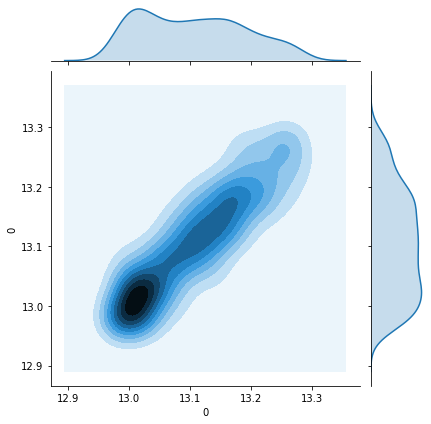

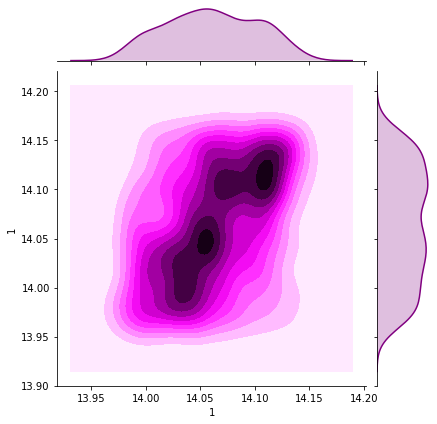

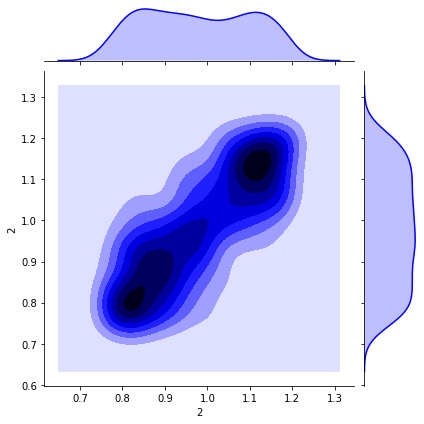

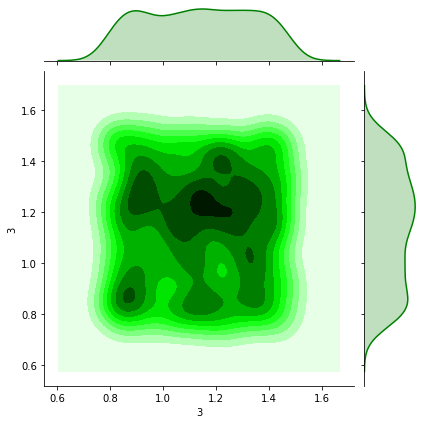

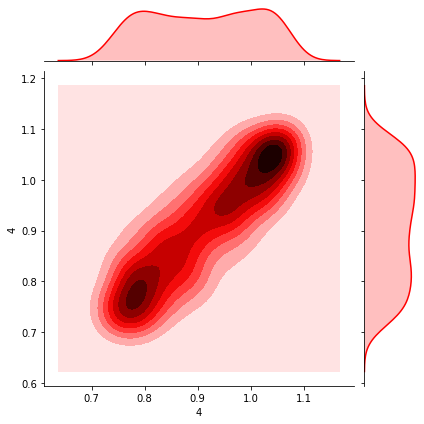

In [12]:
plot_corr(y_rf,y_test)

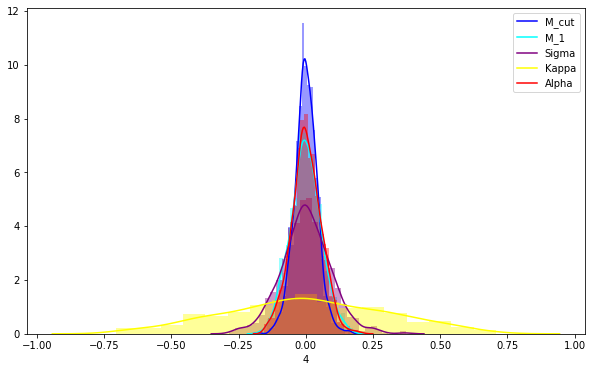

In [13]:
plot_error(y_rf,y_test,dims=(10,6))

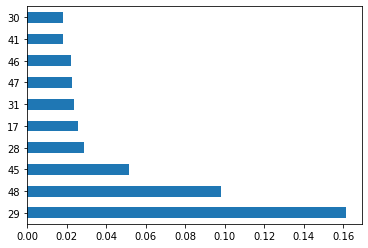

In [14]:
feat_importances = pd.Series(reg_rf.feature_importances_, index=X_data.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [15]:
feat_importances.nlargest(4)

29    0.161177
48    0.098157
45    0.051478
28    0.028655
dtype: float64

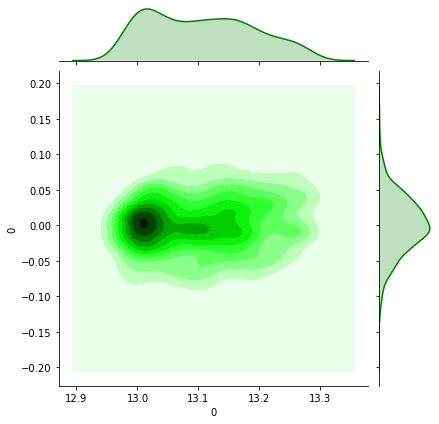

In [16]:
sns.jointplot(y_rf.iloc[:,0],y_rf.iloc[:,0]-y_test.iloc[:,0],kind = 'kde',color='green')

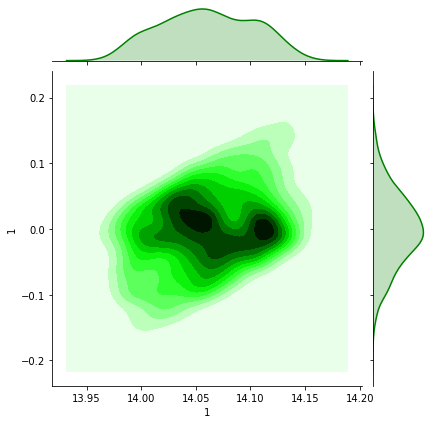

In [17]:
sns.jointplot(y_rf.iloc[:,1],y_rf.iloc[:,1]-y_test.iloc[:,1],kind = 'kde',color='green')

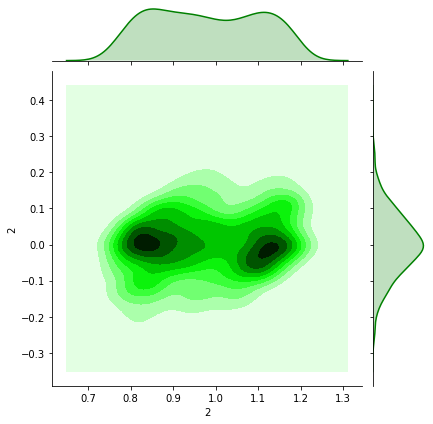

In [18]:
sns.jointplot(y_rf.iloc[:,2],y_rf.iloc[:,2]-y_test.iloc[:,2],kind = 'kde',color='green')

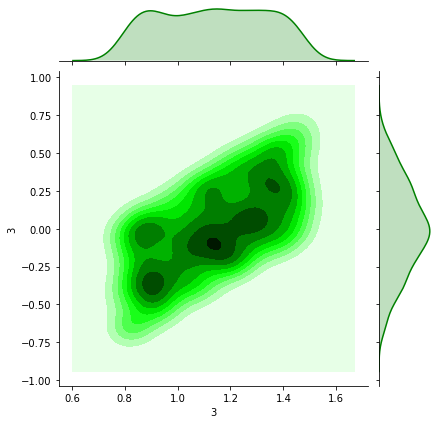

In [19]:
sns.jointplot(y_rf.iloc[:,3],y_rf.iloc[:,3]-y_test.iloc[:,3],kind = 'kde',color='green')

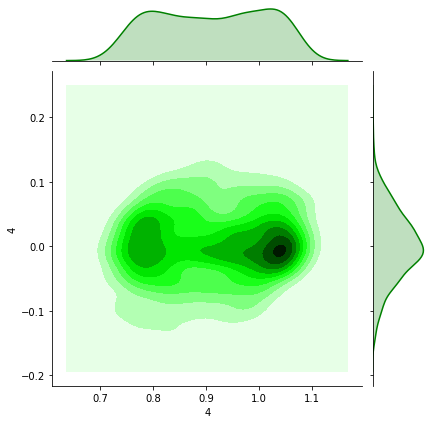

In [20]:
sns.jointplot(y_rf.iloc[:,4],y_rf.iloc[:,4]-y_test.iloc[:,4],kind = 'kde',color='green')

In [7]:
from xgboost import XGBRegressor

#fit multioutput regressor
multioutputregressor = MultiOutputRegressor(XGBRegressor(max_depth=1000,n_estimators=10000, 
                                                         learning_rate=0.05,
                                                         objective = 'reg:squarederror',
                                                         booster='gbtree',
                                                         n_jobs=-1,verbosity=1))
multioutputregressor.fit(X_train, y_train)
# predicting
y_multirf = multioutputregressor.predict(X_test)


In [8]:
print (np.mean((y_multirf - y_test)*100/(y_test), axis=0))
multioutputregressor.score(X_test,y_test)

0   -0.007172
1   -0.007561
2    0.002892
3    3.251961
4    0.051389
dtype: float64


0.664421223332923

In [9]:
y_multirf = pd.DataFrame(y_multirf)
y_multirf.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [10]:
# Root Mean Squared error

print("y1 MSE:%.4f" % np.sqrt(mean_squared_error(y_test.iloc[:,0], y_multirf.iloc[:,0]))) 
print("y2 MSE:%.4f" % np.sqrt(mean_squared_error(y_test.iloc[:,1], y_multirf.iloc[:,1])))
print("y3 MSE:%.4f" % np.sqrt(mean_squared_error(y_test.iloc[:,2], y_multirf.iloc[:,2]))) 
print("y4 MSE:%.4f" % np.sqrt(mean_squared_error(y_test.iloc[:,3], y_multirf.iloc[:,3])))
print("y5 MSE:%.4f" % np.sqrt(mean_squared_error(y_test.iloc[:,4], y_multirf.iloc[:,4]))) 

y1 MSE:0.0235
y2 MSE:0.0356
y3 MSE:0.0507
y4 MSE:0.2277
y5 MSE:0.0234


In [11]:
pd.concat([y_test,y_multirf], axis = 1)

,0,1,2,3,4,0,1,2,3,4
0,13.196576,14.012808,0.817945,1.198550,0.879669,13.205677,14.001897,0.792269,1.309463,0.860149
1,13.082261,14.108074,1.124213,1.290336,0.915377,13.065961,14.101469,1.060795,1.213410,0.896770
2,13.049144,14.051510,1.037052,0.993646,0.909013,13.075047,14.047266,1.099591,1.194153,0.887725
3,13.172424,14.058455,0.772192,1.342354,0.761962,13.197790,14.046609,0.813023,1.038601,0.759304
4,13.169814,14.032113,0.782934,0.804022,0.737809,13.181043,13.996091,0.792148,1.042492,0.747277
...,...,...,...,...,...,...,...,...,...,...
995,13.010089,13.963909,1.055452,0.872565,0.861861,13.000957,14.017472,1.050996,1.152704,0.871383
996,13.031552,14.102644,0.939915,0.962417,1.064765,13.035473,14.113222,0.955293,1.202777,1.037247
997,13.011193,14.064546,0.818708,0.771155,0.747131,13.026514,14.037175,0.826914,1.073846,0.732596
998,13.082471,14.120496,0.913483,1.395753,0.825430,13.065448,14.115167,0.868894,1.262618,0.837402


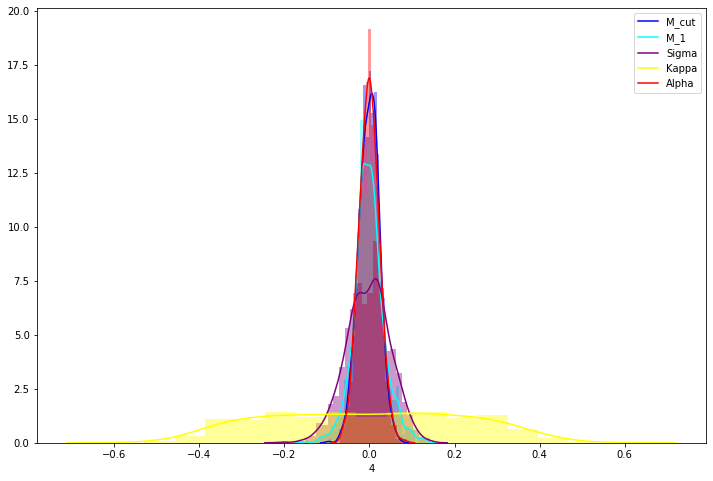

In [12]:
plot_error(y_multirf,y_test)

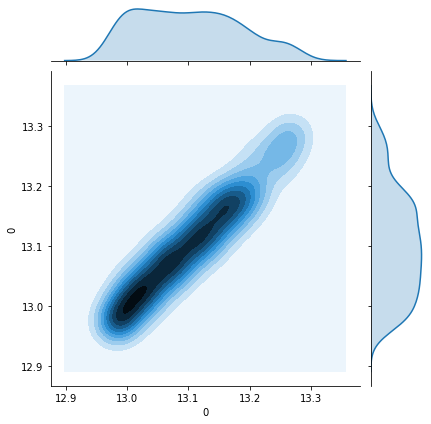

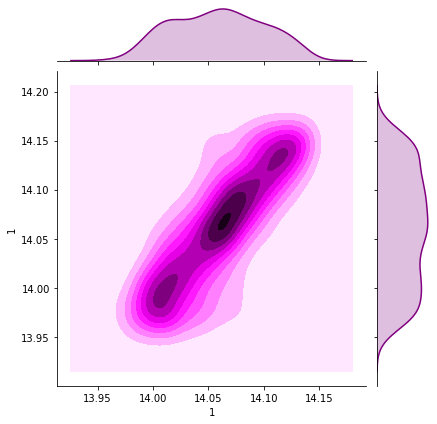

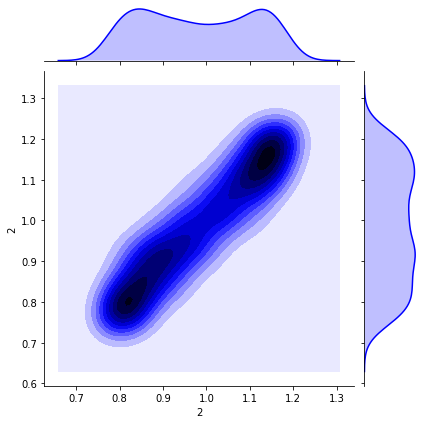

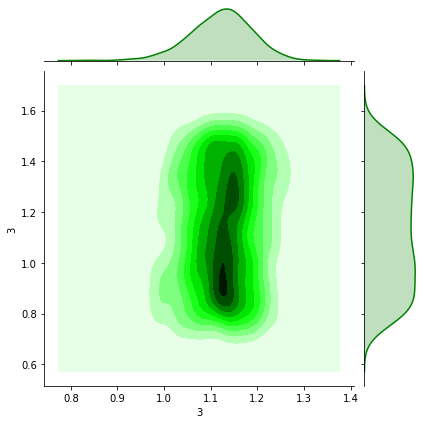

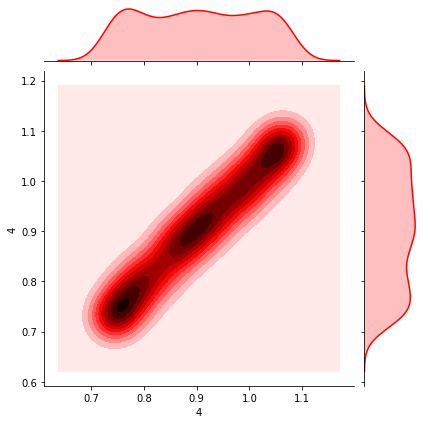

In [13]:
plot_corr(y_multirf,y_test)

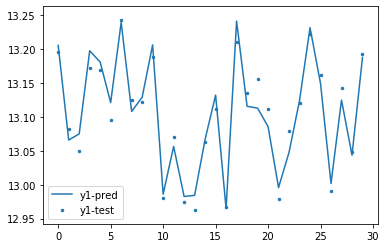

In [20]:
x_ax = range(len(X_test))
plt.scatter(x_ax[:30], y_test.iloc[:30,0],  s=6, label="y1-test")
plt.plot(x_ax[:30], y_multirf.iloc[:30,0], label="y1-pred")
#plt.scatter(x_ax[:20], y_test.iloc[:20,4],  s=6, label="y2-test")
#plt.plot(x_ax[:20], y_multirf.iloc[:20,4], label="y2-pred")
plt.legend()
plt.show()

In [29]:
'''
#from sklearn.model_selection import GridSearchCV
parameters = {"n_estimators":[i for i in range(50,2000,50)],
    "max_depth":[None,200,250,300],
    "min_samples_split":[2],
    "max_features":('auto','sqrt','log2'),
    "bootstrap":[True,False],
    "oob_score":[True,False]}

clf = GridSearchCV(reg_rf, parameters,n_jobs=-1 ,cv=5)
clf.fit(X_train,y_train)
'''

'\n#from sklearn.model_selection import GridSearchCV\nparameters = {"n_estimators":[i for i in range(50,2000,50)],\n    "max_depth":[None,200,250,300],\n    "min_samples_split":[2],\n    "max_features":(\'auto\',\'sqrt\',\'log2\'),\n    "bootstrap":[True,False],\n    "oob_score":[True,False]}\n\nclf = GridSearchCV(reg_rf, parameters,n_jobs=-1 ,cv=5)\nclf.fit(X_train,y_train)\n'

In [30]:
#sorted(clf.cv_results_.keys())

In [31]:
#grid = clf.predict(X_test)
#print (np.mean((grid - y_test)**2/(grid**2), axis=0))